In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df_trainbrainy = pd.read_csv("brainy_dataset.csv")
df_trainhandy = pd.read_csv("handy_dataset.csv")
df_trainjokey = pd.read_csv("jokey_dataset.csv")
df_trainsmurfette = pd.read_csv("smurfette_dataset.csv")
dataframes = ['df_trainbrainy', 'df_trainhandy',  'df_trainsmurfette']

# Loop over the dataframes


for df_name in dataframes:
    df = globals()[df_name]
    df.drop("smurvation_id",axis=1)

   

In [60]:
for df_name in dataframes:
    df = globals()[df_name]
    #print(df.isnull().sum()) 
    #print(f"<======{df_name}, rows={df.shape}========>")
containing_null_columns=["smurfland","smurflings"]
for i in containing_null_columns:
    print(df_trainbrainy[i].dtype)


object
float64


smurfland => fill with the mode  
smurflings => fill with the mean

In [61]:
import re

# here we are unifying the colomns names

for columnName in df_trainhandy.columns:
    name = columnName
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()
    df_trainhandy = df_trainhandy.rename(columns={columnName: name})
    
# here we are also make a unified representation of the columns that contains months


# handle mushotel type

def transform_mushotel_type(x):
    if(str(x).lower().find("village")):return "V"
    elif str(x).lower().find("smurfy"): return "S"
    return "U"
for df_name in dataframes:
    df = globals()[df_name]
    df.mushotel_type=df.mushotel_type.apply(transform_mushotel_type)
    # when loading the dataframes will we also modify the mushostel_type
    





In [62]:
# We Create the new columns date,year and month from smurvation_status_date  for the df_trainbrainy
df_trainbrainy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,arrival_date_day_number
0,98721,S,0,11,SP,Frostwisp,41,2,2,0,2,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,135.00,0,2,04 + Smurfy Passage + Frostwisp,SF,287
1,78892,S,0,30,WW,Frostwisp,42,16,1,2,2,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,102.00,0,2,19 + Wisdom Whirlwind + Frostwisp,SF,294
2,79486,S,0,34,WW,Frostwisp,44,25,2,1,1,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swift-Smurf,65.00,0,0,28 + Wisdom Whirlwind + Frostwisp,SF,308
3,44842,S,0,43,WW,Frostwisp,42,13,0,1,2,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-Party,85.00,0,0,14 + Wisdom Whirlwind + Frostwisp,SF,294
4,964,V,0,3,WW,Harvestember,32,8,2,2,2,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swift-Smurf,211.75,1,3,12 + Wisdom Whirlwind + Harvestember,SF,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27524,51328,S,1,10,SP,Rainboway,21,18,0,2,2,0.0,0,BB,WSD,Giggleline TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,NaN,0,Swift-Smurf,119.50,0,0,17 + Smurfy Passage + Rainboway,SF,147
27525,106371,S,0,0,BB,Sparkleuary,8,23,0,1,1,0.0,0,SC,SMF,Giggleline TA,TA/TO,0,0,0,A,A,1,No Deposit,152.0,NaN,0,Swift-Smurf,58.31,0,0,24 + Blissful Beams + Sparkleuary,SF,56
27526,113739,S,0,1,BB,Sunspark,23,10,0,1,2,0.0,0,BB,SMF,Smurfy Way,Smurfy Way,0,0,0,D,D,0,No Deposit,14.0,NaN,0,Swift-Smurf,175.50,0,2,11 + Blissful Beams + Sunspark,SF,161
27527,73673,S,1,47,BB,Harvestember,35,30,0,2,3,0.0,0,BB,USA,Giggleline TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Swift-Smurf,210.00,0,3,21 + Blissful Beams + Smurfly,SF,245


# Trainbrainy datset smurvation_status_date processing 

In [63]:
df_trainbrainy[['smurvation_status_date_day', 'smurvation_status_date_year', 'smurvation_status_date_month']] = df_trainbrainy['smurvation_status_date'].str.split(r'\s+\+\s+', expand=True)

# Remove leading/trailing whitespace from the new columns
df_trainbrainy['smurvation_status_date_day'] = df_trainbrainy['smurvation_status_date_day'].str.strip()
df_trainbrainy['smurvation_status_date_year'] = df_trainbrainy['smurvation_status_date_year'].str.strip()
df_trainbrainy['smurvation_status_date_month'] = df_trainbrainy['smurvation_status_date_month'].str.strip()

# now we apply transformation to the year
def transform_year(x):
  return ''.join(word[0].upper() for word in x.split())
  df_trainbrainy['smurvation_status_date_year']
df_trainbrainy['smurvation_status_date_year'].apply(transform_year)


df_trainbrainy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,arrival_date_day_number,smurvation_status_date_day,smurvation_status_date_year,smurvation_status_date_month
0,98721,S,0,11,SP,Frostwisp,41,2,2,0,2,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,135.00,0,2,04 + Smurfy Passage + Frostwisp,SF,287,04,Smurfy Passage,Frostwisp
1,78892,S,0,30,WW,Frostwisp,42,16,1,2,2,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,102.00,0,2,19 + Wisdom Whirlwind + Frostwisp,SF,294,19,Wisdom Whirlwind,Frostwisp
2,79486,S,0,34,WW,Frostwisp,44,25,2,1,1,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swift-Smurf,65.00,0,0,28 + Wisdom Whirlwind + Frostwisp,SF,308,28,Wisdom Whirlwind,Frostwisp
3,44842,S,0,43,WW,Frostwisp,42,13,0,1,2,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-Party,85.00,0,0,14 + Wisdom Whirlwind + Frostwisp,SF,294,14,Wisdom Whirlwind,Frostwisp
4,964,V,0,3,WW,Harvestember,32,8,2,2,2,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swift-Smurf,211.75,1,3,12 + Wisdom Whirlwind + Harvestember,SF,224,12,Wisdom Whirlwind,Harvestember
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27524,51328,S,1,10,SP,Rainboway,21,18,0,2,2,0.0,0,BB,WSD,Giggleline TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,NaN,0,Swift-Smurf,119.50,0,0,17 + Smurfy Passage + Rainboway,SF,147,17,Smurfy Passage,Rainboway
27525,106371,S,0,0,BB,Sparkleuary,8,23,0,1,1,0.0,0,SC,SMF,Giggleline TA,TA/TO,0,0,0,A,A,1,No Deposit,152.0,NaN,0,Swift-Smurf,58.31,0,0,24 + Blissful Beams + Sparkleuary,SF,56,24,Blissful Beams,Sparkleuary
27526,113739,S,0,1,BB,Sunspark,23,10,0,1,2,0.0,0,BB,SMF,Smurfy Way,Smurfy Way,0,0,0,D,D,0,No Deposit,14.0,NaN,0,Swift-Smurf,175.50,0,2,11 + Blissful Beams + Sunspark,SF,161,11,Blissful Beams,Sunspark
27527,73673,S,1,47,BB,Harvestember,35,30,0,2,3,0.0,0,BB,USA,Giggleline TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Swift-Smurf,210.00,0,3,21 + Blissful Beams + Smurfly,SF,245,21,Blissful Beams,Smurfly


In [64]:
df_trainsmurfette.smurvation_status_date.head()
df[['smurvation_status_date_month', 'smurvation_status_date_year', 'smurvation_status_date_day']] = df['smurvation_status_date'].str.split(r',\s+|\s+-\s+', expand=True)

# Remove leading/trailing whitespace from the new columns
df['smurvation_status_date_month'] = df['smurvation_status_date_month'].str.strip()
df['smurvation_status_date_year'] = df['smurvation_status_date_year'].str.strip()
df['smurvation_status_date_day'] = df['smurvation_status_date_day'].str.strip()
df_trainsmurfette

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_month,smurvation_status_date_year,smurvation_status_date_day
0,98721,S,0,11,Smurfy Passage,Frostwisp,41,2,2,0,2,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,135.00,0,2,"Frostwisp, Smurfy Passage - 04",Smurfy Jungle,Frostwisp,Smurfy Passage,04
1,78892,S,0,30,Wisdom Whirlwind,Frostwisp,42,16,1,2,2,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,102.00,0,2,"Frostwisp, Wisdom Whirlwind - 19",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,19
2,79486,S,0,34,Wisdom Whirlwind,Frostwisp,44,25,2,1,1,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swift-Smurf,65.00,0,0,"Frostwisp, Wisdom Whirlwind - 28",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,28
3,44842,S,0,43,Wisdom Whirlwind,Frostwisp,42,13,0,1,2,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-Party,85.00,0,0,"Frostwisp, Wisdom Whirlwind - 14",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,14
4,964,V,0,3,Wisdom Whirlwind,Harvestember,32,8,2,2,2,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swift-Smurf,211.75,1,3,"Harvestember, Wisdom Whirlwind - 12",Smurfy Jungle,Harvestember,Wisdom Whirlwind,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,105093,S,0,143,Blissful Beams,Blossommonth,4,26,0,3,2,0.0,0,BB,NLD,Giggleline TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,NaN,0,Swift-Smurf,79.20,0,2,"Blossommonth, Blissful Beams - 29",Smurfy Jungle,Blossommonth,Blissful Beams,29
6113,79179,S,0,2,Wisdom Whirlwind,Frostwisp,43,22,0,1,1,0.0,0,BB,WSD,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,120.00,0,1,"Frostwisp, Wisdom Whirlwind - 23",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,23
6114,28776,V,0,0,Smurfy Passage,Frostwisp,42,10,1,0,1,0.0,0,BB,MRA,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,22.0,0,Swift-Smurf,51.00,0,0,"Frostwisp, Smurfy Passage - 11",Smurfy Jungle,Frostwisp,Smurfy Passage,11
6115,41358,S,0,16,Wisdom Whirlwind,Harvestember,33,15,1,1,2,0.0,0,HB,ITA,Gigglefree TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,17.0,NaN,0,Swift-Party,104.00,0,0,"Harvestember, Wisdom Whirlwind - 17",Smurfy Jungle,Harvestember,Wisdom Whirlwind,17


# Handling the trainhandy dataset now

In [65]:

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# and the column with the values in the format 'year1 month year2, date' is called 'smurvation_status_date'

# Splitting the column into separate parts
df_trainhandy[['year1_month_year2', 'smurvation_status_date_day']] = df_trainhandy['smurvation_status_date'].str.split(',', expand=True)
df_trainhandy[['year1', 'smurvation_status_date_month', 'year2']] = df_trainhandy['year1_month_year2'].str.split(' ', expand=True)

# Combining year1 and year2 into a single column without spaces
df_trainhandy['smurvation_status_date_year'] = df_trainhandy['year1'].str[0].str.upper() + df_trainhandy['year2'].str[0].str.upper()

# Dropping unnecessary columns
df_trainhandy = df_trainhandy.drop(['year1_month_year2', 'year1', 'year2'], axis=1)
df_trainhandy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_day,smurvation_status_date_month,smurvation_status_date_year
0,98721,S,0,264,smurfyPassage,frostwisp,41,2,2,0,20000,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,SwiJt-Smurf,135.00,0,2,"Smurfy Frostwisp Passage, 04",Smurfy Jungle,04,Frostwisp,SP
1,78892,S,0,720,wisdomWhirlwind,frostwisp,42,16,1,2,20000,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,LeAf,102.00,0,2,"Wisdom Frostwisp Whirlwind, 19",Smurfy Jungle,19,Frostwisp,WW
2,79486,S,0,816,wisdomWhirlwind,frostwisp,44,25,2,1,10000,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swtft-Smurf,65.00,0,0,"Wisdom Frostwisp Whirlwind, 28",Smurfy Jungle,28,Frostwisp,WW
3,44842,S,0,1032,wisdomWhirlwind,frostwisp,42,13,0,1,20000,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-PUrty,85.00,0,0,"Wisdom Frostwisp Whirlwind, 14",Smurfy Jungle,14,Frostwisp,WW
4,964,V,0,72,wisdomWhirlwind,harvestember,32,8,2,2,20000,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swifk-Smurf,211.75,1,3,"Wisdom Harvestember Whirlwind, 12",Smurfy Jungle,12,Harvestember,WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,83876,S,0,96,smurfyPassage,sparkleuary,7,13,0,1,2,0.0,0,SC,SMF,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,79.00,0,0,"Smurfy Sparkleuary Passage, 14",Smurfy Jungle,14,Sparkleuary,SP
45878,20058,V,0,1296,smurfyPassage,blossommonth,3,13,0,2,2,0.0,0,BB,MRA,Gigglefree TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Swift-Smurf,26.00,0,0,"Smurfy Blossommonth Passage, 15",Smurfy Jungle,15,Blossommonth,SP
45879,33397,V,0,0,blissfulBeams,sparkleuary,8,21,0,1,2,0.0,0,BB,SMF,Smurfy Way,Smurfy Way,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Swift-Smurf,60.00,1,0,"Blissful Sparkleuary Beams, 22",Smurfy Jungle,22,Sparkleuary,BB
45880,21703,V,0,24,blissfulBeams,rainboway,20,17,0,1,1,0.0,0,BB,SMF,Giggleline TA,TA/TO,1,0,5,A,A,0,No Deposit,241.0,NaN,0,Squad,61.60,1,1,"Blissful Rainboway Beams, 18",Smurfy Jungle,18,Rainboway,BB


# Smurfette data set handling

In [66]:
# columns adding

In [67]:
# handling the month columns 
for column in df_trainhandy.columns:
    if column.find("month")!=-1:
        for df_name in dataframes:
            df=globals()[df_name]
            if(df[column].dtype=="object"):
                df[column].apply(lambda x:x.upper())



# now we replace all month columns that are numbered with their corresponding name

In [68]:
df_trainbrainy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,arrival_date_day_number,smurvation_status_date_day,smurvation_status_date_year,smurvation_status_date_month
0,98721,S,0,11,SP,Frostwisp,41,2,2,0,2,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,135.00,0,2,04 + Smurfy Passage + Frostwisp,SF,287,04,Smurfy Passage,Frostwisp
1,78892,S,0,30,WW,Frostwisp,42,16,1,2,2,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,102.00,0,2,19 + Wisdom Whirlwind + Frostwisp,SF,294,19,Wisdom Whirlwind,Frostwisp
2,79486,S,0,34,WW,Frostwisp,44,25,2,1,1,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swift-Smurf,65.00,0,0,28 + Wisdom Whirlwind + Frostwisp,SF,308,28,Wisdom Whirlwind,Frostwisp
3,44842,S,0,43,WW,Frostwisp,42,13,0,1,2,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-Party,85.00,0,0,14 + Wisdom Whirlwind + Frostwisp,SF,294,14,Wisdom Whirlwind,Frostwisp
4,964,V,0,3,WW,Harvestember,32,8,2,2,2,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swift-Smurf,211.75,1,3,12 + Wisdom Whirlwind + Harvestember,SF,224,12,Wisdom Whirlwind,Harvestember
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27524,51328,S,1,10,SP,Rainboway,21,18,0,2,2,0.0,0,BB,WSD,Giggleline TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,NaN,0,Swift-Smurf,119.50,0,0,17 + Smurfy Passage + Rainboway,SF,147,17,Smurfy Passage,Rainboway
27525,106371,S,0,0,BB,Sparkleuary,8,23,0,1,1,0.0,0,SC,SMF,Giggleline TA,TA/TO,0,0,0,A,A,1,No Deposit,152.0,NaN,0,Swift-Smurf,58.31,0,0,24 + Blissful Beams + Sparkleuary,SF,56,24,Blissful Beams,Sparkleuary
27526,113739,S,0,1,BB,Sunspark,23,10,0,1,2,0.0,0,BB,SMF,Smurfy Way,Smurfy Way,0,0,0,D,D,0,No Deposit,14.0,NaN,0,Swift-Smurf,175.50,0,2,11 + Blissful Beams + Sunspark,SF,161,11,Blissful Beams,Sunspark
27527,73673,S,1,47,BB,Harvestember,35,30,0,2,3,0.0,0,BB,USA,Giggleline TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Swift-Smurf,210.00,0,3,21 + Blissful Beams + Smurfly,SF,245,21,Blissful Beams,Smurfly


In [69]:
df_trainhandy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_day,smurvation_status_date_month,smurvation_status_date_year
0,98721,S,0,264,smurfyPassage,frostwisp,41,2,2,0,20000,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,SwiJt-Smurf,135.00,0,2,"Smurfy Frostwisp Passage, 04",Smurfy Jungle,04,Frostwisp,SP
1,78892,S,0,720,wisdomWhirlwind,frostwisp,42,16,1,2,20000,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,LeAf,102.00,0,2,"Wisdom Frostwisp Whirlwind, 19",Smurfy Jungle,19,Frostwisp,WW
2,79486,S,0,816,wisdomWhirlwind,frostwisp,44,25,2,1,10000,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swtft-Smurf,65.00,0,0,"Wisdom Frostwisp Whirlwind, 28",Smurfy Jungle,28,Frostwisp,WW
3,44842,S,0,1032,wisdomWhirlwind,frostwisp,42,13,0,1,20000,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-PUrty,85.00,0,0,"Wisdom Frostwisp Whirlwind, 14",Smurfy Jungle,14,Frostwisp,WW
4,964,V,0,72,wisdomWhirlwind,harvestember,32,8,2,2,20000,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swifk-Smurf,211.75,1,3,"Wisdom Harvestember Whirlwind, 12",Smurfy Jungle,12,Harvestember,WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,83876,S,0,96,smurfyPassage,sparkleuary,7,13,0,1,2,0.0,0,SC,SMF,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,79.00,0,0,"Smurfy Sparkleuary Passage, 14",Smurfy Jungle,14,Sparkleuary,SP
45878,20058,V,0,1296,smurfyPassage,blossommonth,3,13,0,2,2,0.0,0,BB,MRA,Gigglefree TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Swift-Smurf,26.00,0,0,"Smurfy Blossommonth Passage, 15",Smurfy Jungle,15,Blossommonth,SP
45879,33397,V,0,0,blissfulBeams,sparkleuary,8,21,0,1,2,0.0,0,BB,SMF,Smurfy Way,Smurfy Way,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Swift-Smurf,60.00,1,0,"Blissful Sparkleuary Beams, 22",Smurfy Jungle,22,Sparkleuary,BB
45880,21703,V,0,24,blissfulBeams,rainboway,20,17,0,1,1,0.0,0,BB,SMF,Giggleline TA,TA/TO,1,0,5,A,A,0,No Deposit,241.0,NaN,0,Squad,61.60,1,1,"Blissful Rainboway Beams, 18",Smurfy Jungle,18,Rainboway,BB


In [70]:
df_trainsmurfette

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_month,smurvation_status_date_year,smurvation_status_date_day
0,98721,S,0,11,Smurfy Passage,Frostwisp,41,2,2,0,2,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,135.00,0,2,"Frostwisp, Smurfy Passage - 04",Smurfy Jungle,Frostwisp,Smurfy Passage,04
1,78892,S,0,30,Wisdom Whirlwind,Frostwisp,42,16,1,2,2,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,102.00,0,2,"Frostwisp, Wisdom Whirlwind - 19",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,19
2,79486,S,0,34,Wisdom Whirlwind,Frostwisp,44,25,2,1,1,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swift-Smurf,65.00,0,0,"Frostwisp, Wisdom Whirlwind - 28",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,28
3,44842,S,0,43,Wisdom Whirlwind,Frostwisp,42,13,0,1,2,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-Party,85.00,0,0,"Frostwisp, Wisdom Whirlwind - 14",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,14
4,964,V,0,3,Wisdom Whirlwind,Harvestember,32,8,2,2,2,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swift-Smurf,211.75,1,3,"Harvestember, Wisdom Whirlwind - 12",Smurfy Jungle,Harvestember,Wisdom Whirlwind,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,105093,S,0,143,Blissful Beams,Blossommonth,4,26,0,3,2,0.0,0,BB,NLD,Giggleline TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,NaN,0,Swift-Smurf,79.20,0,2,"Blossommonth, Blissful Beams - 29",Smurfy Jungle,Blossommonth,Blissful Beams,29
6113,79179,S,0,2,Wisdom Whirlwind,Frostwisp,43,22,0,1,1,0.0,0,BB,WSD,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Leaf,120.00,0,1,"Frostwisp, Wisdom Whirlwind - 23",Smurfy Jungle,Frostwisp,Wisdom Whirlwind,23
6114,28776,V,0,0,Smurfy Passage,Frostwisp,42,10,1,0,1,0.0,0,BB,MRA,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,22.0,0,Swift-Smurf,51.00,0,0,"Frostwisp, Smurfy Passage - 11",Smurfy Jungle,Frostwisp,Smurfy Passage,11
6115,41358,S,0,16,Wisdom Whirlwind,Harvestember,33,15,1,1,2,0.0,0,HB,ITA,Gigglefree TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,17.0,NaN,0,Swift-Party,104.00,0,0,"Harvestember, Wisdom Whirlwind - 17",Smurfy Jungle,Harvestember,Wisdom Whirlwind,17


In [71]:
# Years processing:
# processing the arrival_date 
def transform_arrival_date_year(x):
 
  if (str(x).lower().find("beam")!=-1):return "BB"
  if (str(x).lower().find("wisdom")!=-1):return "WW"
  if(str(x).lower().find("smurfy")!=-1):return "SP"
  if(str(x).lower().find("time")!=-1):return "TT"
  return x
  

for df_name in dataframes:
  df=globals()[df_name]
  df.arrival_date_year=df.arrival_date_year.apply(transform_arrival_date_year)
  df.smurvation_status_date_year =df.smurvation_status_date_year.apply(transform_arrival_date_year)
  

    
    

In [72]:
def get_categorical_columns(df):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
            categorical_columns.append(column)
    return categorical_columns



def get_numeric_columns(df):
    numeric_columns = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
    return numeric_columns

categorical_columns=get_categorical_columns(df_trainbrainy)




In [73]:
df_trainhandy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_day,smurvation_status_date_month,smurvation_status_date_year
0,98721,S,0,264,SP,frostwisp,41,2,2,0,20000,0.0,0,SC,BEL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,SwiJt-Smurf,135.00,0,2,"Smurfy Frostwisp Passage, 04",Smurfy Jungle,04,Frostwisp,SP
1,78892,S,0,720,WW,frostwisp,42,16,1,2,20000,0.0,0,BB,COL,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,LeAf,102.00,0,2,"Wisdom Frostwisp Whirlwind, 19",Smurfy Jungle,19,Frostwisp,WW
2,79486,S,0,816,WW,frostwisp,44,25,2,1,10000,0.0,0,BB,SMF,Corporate,Corporate,0,0,0,A,A,1,No Deposit,NaN,40.0,0,Swtft-Smurf,65.00,0,0,"Wisdom Frostwisp Whirlwind, 28",Smurfy Jungle,28,Frostwisp,WW
3,44842,S,0,1032,WW,frostwisp,42,13,0,1,20000,0.0,0,BB,SMF,Gigglefree TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,63.0,NaN,0,Swift-PUrty,85.00,0,0,"Wisdom Frostwisp Whirlwind, 14",Smurfy Jungle,14,Frostwisp,WW
4,964,V,0,72,WW,harvestember,32,8,2,2,20000,0.0,0,HB,MRA,Giggleline TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Swifk-Smurf,211.75,1,3,"Wisdom Harvestember Whirlwind, 12",Smurfy Jungle,12,Harvestember,WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,83876,S,0,96,SP,sparkleuary,7,13,0,1,2,0.0,0,SC,SMF,Giggleline TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Swift-Smurf,79.00,0,0,"Smurfy Sparkleuary Passage, 14",Smurfy Jungle,14,Sparkleuary,SP
45878,20058,V,0,1296,SP,blossommonth,3,13,0,2,2,0.0,0,BB,MRA,Gigglefree TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Swift-Smurf,26.00,0,0,"Smurfy Blossommonth Passage, 15",Smurfy Jungle,15,Blossommonth,SP
45879,33397,V,0,0,BB,sparkleuary,8,21,0,1,2,0.0,0,BB,SMF,Smurfy Way,Smurfy Way,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Swift-Smurf,60.00,1,0,"Blissful Sparkleuary Beams, 22",Smurfy Jungle,22,Sparkleuary,BB
45880,21703,V,0,24,BB,rainboway,20,17,0,1,1,0.0,0,BB,SMF,Giggleline TA,TA/TO,1,0,5,A,A,0,No Deposit,241.0,NaN,0,Squad,61.60,1,1,"Blissful Rainboway Beams, 18",Smurfy Jungle,18,Rainboway,BB


In [74]:
# converting hours to days
df_trainhandy["booking_lead_time"] = df_trainhandy["booking_lead_time"] / 24

# Unification of the other columns :

In [75]:
df_trainbrainy["meal_type"].unique()


array(['SC', 'BB', 'HB', 'FB', 'Undefined'], dtype=object)

# Meal type unifications

In [76]:
df_trainbrainy["meal_type"] = df_trainbrainy["meal_type"].apply(lambda x: x[0].upper())
df_trainhandy["meal_type"] = df_trainhandy["meal_type"].apply(lambda x: x[0].upper())
df_trainsmurfette["meal_type"] = df_trainsmurfette["meal_type"].apply(lambda x: x[0].upper())

# Market Segment Unification

In [77]:
df_trainbrainy["market_segment"] = df_trainbrainy["market_segment"].apply(lambda x: x.upper())
df_trainhandy["market_segment"] = df_trainhandy["market_segment"].apply(lambda x: x.upper())
df_trainsmurfette["market_segment"] = df_trainsmurfette["market_segment"].apply(lambda x: x.upper())

# Booking channel

In [78]:
df_trainbrainy["booking_channel"] = df_trainbrainy["booking_channel"].apply(lambda x: x[0].upper())
df_trainhandy["booking_channel"] = df_trainhandy["booking_channel"].apply(lambda x: x[0].upper())
df_trainsmurfette["booking_channel"] = df_trainsmurfette["booking_channel"].apply(lambda x: x[0].upper())

# Deposit type Cleaning

In [79]:
for df_name in dataframes:
    df = globals()[df_name] 
    df["deposit_type"] = df["deposit_type"].apply(lambda x: x.upper() if isinstance(x, str) else x)

# Customer Type Unification

In [80]:
def take_initialze(string):
    words = string.split("-")  # Split the string into a list of words

    first_letters = [word[0].upper() for word in words]  # Extract the first letter of each word

    # If you want the first letters as a single string, you can use the join() method
    first_letters_string = ''.join(first_letters)
    return first_letters_string


possible_values = ["SWIFT-SMURF", "SWIFT-PARTY", "LEAF", "SQUAD"]
for df_name in dataframes:
    df = globals()[df_name] 
    df["customer_type"] = df["customer_type"].apply(lambda x: x.upper() if isinstance(x, str) else x)
    df["customer_type"] = df["customer_type"].apply(lambda x: take_initialze(x) if (isinstance(x, str) and x in possible_values) else x)

In [81]:


df_trainbrainy=df_trainbrainy[df_trainbrainy['wisymurfs'] <=10]
df_trainhandy= df_trainhandy[df_trainhandy['wisymurfs'] <= 10]
df_trainsmurfette= df_trainsmurfette[df_trainsmurfette['wisymurfs'] <= 10]

In [82]:
pd.set_option('display.max_columns', None)
df_trainhandy.wisymurfs.unique()

array([0, 2, 3, 1, 4, 5])

In [83]:
df_trainhandy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_day,smurvation_status_date_month,smurvation_status_date_year
71,46546,S,0,33.0,SP,blossommonth,2,6,0,2,0,2.0,0,B,BRA,GIGGLELINE TA,T,0,0,0,B,B,0,NO DEPOSIT,9.0,NaN,0,SP,6.00,0,1,"Smurfy Blossommonth Passage, 08",Smurfy Jungle,08,Blossommonth,SP
597,46646,S,0,40.0,SP,blossommonth,3,14,0,3,0,2.0,0,B,MRA,GIGGLELINE TA,T,0,0,0,B,B,1,NO DEPOSIT,9.0,NaN,0,SS,6.00,0,1,"Smurfy Blossommonth Passage, 17",Smurfy Jungle,17,Blossommonth,SP
688,9462,V,1,82.0,SP,merrysnow,49,2,0,2,2,0.0,0,H,SMF,GIGGLELINE TA,T,0,0,0,D,D,0,NO DEPOSIT,240.0,NaN,0,SS,85.50,0,2,"Smurfy Merrysnow Passage, 02",Smurfy Jungle,02,Merrysnow,SP
689,29526,V,0,0.0,SP,frostwisp,44,29,0,1,2,1.0,0,B,SMF,SMURFY WAY,S,0,0,0,A,C,0,NO DEPOSIT,NaN,NaN,0,SS,90.00,0,0,"Smurfy Frostwisp Passage, 30",Smurfy Jungle,30,Frostwisp,SP
690,89154,S,0,78.0,SP,rainboway,20,14,2,2,2,0.0,0,B,WSD,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,SS,119.85,0,2,"Smurfy Rainboway Passage, 18",Smurfy Jungle,18,Rainboway,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,83876,S,0,4.0,SP,sparkleuary,7,13,0,1,2,0.0,0,S,SMF,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,SS,79.00,0,0,"Smurfy Sparkleuary Passage, 14",Smurfy Jungle,14,Sparkleuary,SP
45878,20058,V,0,54.0,SP,blossommonth,3,13,0,2,2,0.0,0,B,MRA,GIGGLEFREE TA/TO,T,0,0,0,A,D,0,NO DEPOSIT,6.0,NaN,0,SS,26.00,0,0,"Smurfy Blossommonth Passage, 15",Smurfy Jungle,15,Blossommonth,SP
45879,33397,V,0,0.0,BB,sparkleuary,8,21,0,1,2,0.0,0,B,SMF,SMURFY WAY,S,0,0,0,A,A,0,NO DEPOSIT,NaN,NaN,0,SS,60.00,1,0,"Blissful Sparkleuary Beams, 22",Smurfy Jungle,22,Sparkleuary,BB
45880,21703,V,0,1.0,BB,rainboway,20,17,0,1,1,0.0,0,B,SMF,GIGGLELINE TA,T,1,0,5,A,A,0,NO DEPOSIT,241.0,NaN,0,S,61.60,1,1,"Blissful Rainboway Beams, 18",Smurfy Jungle,18,Rainboway,BB


In [84]:
df_trainsmurfette

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,smurvation_status_date_month,smurvation_status_date_year,smurvation_status_date_day
0,98721,S,0,11,SP,Frostwisp,41,2,2,0,2,0.0,0,S,BEL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,SS,135.00,0,2,"Frostwisp, Smurfy Passage - 04",Smurfy Jungle,Frostwisp,SP,04
1,78892,S,0,30,WW,Frostwisp,42,16,1,2,2,0.0,0,B,COL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,L,102.00,0,2,"Frostwisp, Wisdom Whirlwind - 19",Smurfy Jungle,Frostwisp,WW,19
2,79486,S,0,34,WW,Frostwisp,44,25,2,1,1,0.0,0,B,SMF,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,NaN,40.0,0,SS,65.00,0,0,"Frostwisp, Wisdom Whirlwind - 28",Smurfy Jungle,Frostwisp,WW,28
3,44842,S,0,43,WW,Frostwisp,42,13,0,1,2,0.0,0,B,SMF,GIGGLEFREE TA/TO,T,0,0,0,A,A,0,NO DEPOSIT,63.0,NaN,0,SP,85.00,0,0,"Frostwisp, Wisdom Whirlwind - 14",Smurfy Jungle,Frostwisp,WW,14
4,964,V,0,3,WW,Harvestember,32,8,2,2,2,0.0,0,H,MRA,GIGGLELINE TA,T,0,0,0,A,D,0,NO DEPOSIT,240.0,NaN,0,SS,211.75,1,3,"Harvestember, Wisdom Whirlwind - 12",Smurfy Jungle,Harvestember,WW,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,105093,S,0,143,BB,Blossommonth,4,26,0,3,2,0.0,0,B,NLD,GIGGLELINE TA,T,0,0,0,A,A,1,NO DEPOSIT,9.0,NaN,0,SS,79.20,0,2,"Blossommonth, Blissful Beams - 29",Smurfy Jungle,Blossommonth,BB,29
6113,79179,S,0,2,WW,Frostwisp,43,22,0,1,1,0.0,0,B,WSD,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,L,120.00,0,1,"Frostwisp, Wisdom Whirlwind - 23",Smurfy Jungle,Frostwisp,WW,23
6114,28776,V,0,0,SP,Frostwisp,42,10,1,0,1,0.0,0,B,MRA,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,NaN,22.0,0,SS,51.00,0,0,"Frostwisp, Smurfy Passage - 11",Smurfy Jungle,Frostwisp,SP,11
6115,41358,S,0,16,WW,Harvestember,33,15,1,1,2,0.0,0,H,ITA,GIGGLEFREE TA/TO,T,0,0,0,A,B,0,NO DEPOSIT,17.0,NaN,0,SP,104.00,0,0,"Harvestember, Wisdom Whirlwind - 17",Smurfy Jungle,Harvestember,WW,17


In [85]:
df_trainbrainy

,smurvation_id,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,agent,moberry,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date,mushotel_location,arrival_date_day_number,smurvation_status_date_day,smurvation_status_date_year,smurvation_status_date_month
0,98721,S,0,11,SP,Frostwisp,41,2,2,0,2,0.0,0,S,BEL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,SS,135.00,0,2,04 + Smurfy Passage + Frostwisp,SF,287,04,SP,Frostwisp
1,78892,S,0,30,WW,Frostwisp,42,16,1,2,2,0.0,0,B,COL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,9.0,NaN,0,L,102.00,0,2,19 + Wisdom Whirlwind + Frostwisp,SF,294,19,WW,Frostwisp
2,79486,S,0,34,WW,Frostwisp,44,25,2,1,1,0.0,0,B,SMF,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,NaN,40.0,0,SS,65.00,0,0,28 + Wisdom Whirlwind + Frostwisp,SF,308,28,WW,Frostwisp
3,44842,S,0,43,WW,Frostwisp,42,13,0,1,2,0.0,0,B,SMF,GIGGLEFREE TA/TO,T,0,0,0,A,A,0,NO DEPOSIT,63.0,NaN,0,SP,85.00,0,0,14 + Wisdom Whirlwind + Frostwisp,SF,294,14,WW,Frostwisp
4,964,V,0,3,WW,Harvestember,32,8,2,2,2,0.0,0,H,MRA,GIGGLELINE TA,T,0,0,0,A,D,0,NO DEPOSIT,240.0,NaN,0,SS,211.75,1,3,12 + Wisdom Whirlwind + Harvestember,SF,224,12,WW,Harvestember
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27524,51328,S,1,10,SP,Rainboway,21,18,0,2,2,0.0,0,B,WSD,GIGGLELINE TA,T,0,0,0,B,B,1,NO DEPOSIT,9.0,NaN,0,SS,119.50,0,0,17 + Smurfy Passage + Rainboway,SF,147,17,SP,Rainboway
27525,106371,S,0,0,BB,Sparkleuary,8,23,0,1,1,0.0,0,S,SMF,GIGGLELINE TA,T,0,0,0,A,A,1,NO DEPOSIT,152.0,NaN,0,SS,58.31,0,0,24 + Blissful Beams + Sparkleuary,SF,56,24,BB,Sparkleuary
27526,113739,S,0,1,BB,Sunspark,23,10,0,1,2,0.0,0,B,SMF,SMURFY WAY,S,0,0,0,D,D,0,NO DEPOSIT,14.0,NaN,0,SS,175.50,0,2,11 + Blissful Beams + Sunspark,SF,161,11,BB,Sunspark
27527,73673,S,1,47,BB,Harvestember,35,30,0,2,3,0.0,0,B,USA,GIGGLELINE TA,T,0,0,0,D,D,0,NO DEPOSIT,9.0,NaN,0,SS,210.00,0,3,21 + Blissful Beams + Smurfly,SF,245,21,BB,Smurfly


In [86]:
df_trainhandy.arrival_date_month=df_trainhandy.arrival_date_month.apply(lambda x:str(x).capitalize())
for c in df_trainhandy.columns:
  print(f"<<<<<<  {c}  >>>>>")
  print(df_trainhandy[c].unique())
  print("")

/tmp/ipykernel_73236/1210235853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainhandy.arrival_date_month=df_trainhandy.arrival_date_month.apply(lambda x:str(x).capitalize())


<<<<<<  smurvation_id  >>>>>
[46546 46646  9462 ... 33397 21703 13185]

<<<<<<  mushotel_type  >>>>>
['S' 'V']

<<<<<<  is_canceled  >>>>>
[0 1]

<<<<<<  booking_lead_time  >>>>>
[ 33.  40.  82.   0.  78.   4. 112. 172. 312.  90.  23. 230.  73.   8.
 182.   1.  35. 274.  64.  12.  19.  16.  18.  51.  36. 232.  17.  25.
  81.  83. 217.  69. 122. 209.  74.  96. 131.  37.   3.  61.  26.  91.
  41. 195.   9.  15.  39. 178. 164. 115.  63.  10. 190. 200.  67.  60.
 101.  31. 127. 386. 116. 100. 268. 106. 147. 111. 365.  53.  92.  72.
 273.  97. 173.  22. 180. 135. 165. 225. 169. 146.   6. 329.  43. 224.
 322.   5. 199. 129. 110.  59.   7. 304. 136.  13.  56.  62. 123.  28.
   2.  77.  29.  44. 276. 114. 161. 134.  30. 216. 475. 262. 344.  50.
 121.  24. 220. 203. 120. 238. 231. 157.  11.  70.  45. 285.  80.  34.
  66.  55.  14.  20. 325. 137. 166.  47.  57.  38.  42.  98.  27. 139.
  89.  32. 113.  75. 118.  46.  52. 236. 104. 138. 109. 221. 334.  49.
 103.  87. 133. 163.  79. 330. 247.  88.

# Concatenation of the dataSets


In [87]:


df = pd.concat([df_trainbrainy, df_trainhandy,  df_trainsmurfette], ignore_index=False, sort=False)

df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78831 entries, 0 to 6116
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   smurvation_id                     78831 non-null  int64  
 1   mushotel_type                     78831 non-null  object 
 2   is_canceled                       78831 non-null  int64  
 3   booking_lead_time                 78831 non-null  float64
 4   arrival_date_year                 78831 non-null  object 
 5   arrival_date_month                78831 non-null  object 
 6   arrival_date_week_number          78831 non-null  int64  
 7   arrival_date_day_of_month         78831 non-null  int64  
 8   weekend_stays                     78831 non-null  int64  
 9   weekday_stays                     78831 non-null  int64  
 10  wisymurfs                         78831 non-null  int64  
 11  smurflings                        78828 non-null  float64
 12  number_of_

In [88]:
for column in df.columns:
  print(f"<<<<<<<<<<<<<<{column}>>>>>>>>>>>>>>")
  print(df[column].unique())

<<<<<<<<<<<<<<smurvation_id>>>>>>>>>>>>>>
[98721 78892 79486 ... 33397 21703 13185]
<<<<<<<<<<<<<<mushotel_type>>>>>>>>>>>>>>
['S' 'V']
<<<<<<<<<<<<<<is_canceled>>>>>>>>>>>>>>
[0 1]
<<<<<<<<<<<<<<booking_lead_time>>>>>>>>>>>>>>
[ 11.  30.  34.  43.   3.   6.   1. 116.   5.  16. 153.  60.  50.  61.
 294.  10.  29. 162.  28. 207.  12.  23. 305. 125. 187. 199.  31.   0.
  32. 394.  83. 287.  93.  36. 138.  55. 119.   7.  42.  48. 191. 146.
 405. 195. 237.  35. 464. 318. 217. 132. 142. 289.  20. 185.  82. 264.
  33.  76. 212. 157. 155. 169.  57.  37.  14.  87. 106.  51.  70.   4.
  97. 168. 114.  47.  86. 171.  78. 229. 128.  38.  65.  19. 133. 148.
 235. 102. 101.  15. 184. 190. 233.   2.  27.  59.  88. 107. 137.  96.
 115.   9. 186. 140. 224.  90.  13. 109. 141. 220. 143. 241.  54.  98.
 152. 154. 219. 320. 111. 129.  68.  63. 350.  25.  52.  66.   8.  62.
 151.  95.  49. 170. 130.  69. 306. 280.  46.  45. 147.  21. 113. 131.
  72.  40. 277. 340. 227. 246.  22. 176. 117.  44.  92.  53. 1

In [89]:
# droping the columns
droped_columns=["agent","mushotel_location","moberry","smurvation_status_date","arrival_date_week_number","smurvation_id","arrival_date_day_number"]

for c in droped_columns:
  df=df.drop(c,axis=1)

In [90]:
df.describe()

,is_canceled,booking_lead_time,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,smurfberry_spaces_required,number_of_special_requests
count,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000,78828.000000,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000,78831.000000
mean,0.275704,79.775127,15.824346,1.000406,2.624691,1.871649,0.138479,0.010884,0.038564,0.031409,0.176327,0.270744,0.774327,106.412245,0.084992,0.702262
std,0.446871,85.611777,8.858038,1.020692,2.025519,0.511288,0.455463,0.105696,0.192553,0.402110,1.573152,0.724260,10.377207,61.295887,0.280821,0.836522
min,0.000000,-13.000000,-26.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.170000,0.000000,0.000000
75%,1.000000,125.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,709.000000,31.000000,19.000000,50.000000,5.000000,3.000000,2.000000,1.000000,26.000000,71.000000,20.000000,391.000000,5400.000000,3.000000,5.000000


In [91]:

# here we drop the negative date values 
df=df[df["arrival_date_day_of_month"]>0]
df=df[df["booking_lead_time"]>=0]
df=df[df["average_daily_rate"]>=0]

In [92]:
df.arrival_date_day_of_month.unique()


array([ 2, 16, 25, 13,  8,  7,  4, 17, 30, 10, 24,  5, 21, 19, 20, 29, 14,
        9, 23,  6, 11, 15,  3,  1, 28, 12, 22, 18, 31, 26, 27])

In [93]:
df.weekend_stays.unique()

array([ 2,  1,  0,  3,  4,  8,  7,  9,  6,  5, 12, 10, 19])

In [94]:
# filling the null values 

df['smurfland'] = df['smurfland'].fillna(df['smurfland'].mode()[0])
df['smurflings'] = df['smurflings'].fillna(df['smurflings'].mode()[0])

In [95]:
df.isnull().sum()

mushotel_type                       0
is_canceled                         0
booking_lead_time                   0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
weekend_stays                       0
weekday_stays                       0
wisymurfs                           0
smurflings                          0
number_of_babies                    0
meal_type                           0
smurfland                           0
market_segment                      0
booking_channel                     0
smurfy_smurf                        0
number_of_previous_cancellations    0
previous_bookings_not_canceled      0
requested_mushroom_type             0
allocated_mushroom_type             0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
average_daily_rate                  0
smurfberry_spaces_required          0
number_of_sp

# Feature Engineering

In [96]:
# Feature engineering and adding new columns
df["total_bookings"]=df.number_of_previous_cancellations+df.previous_bookings_not_canceled
df["most_likely_to_be_canceled"]=df['most_likely_to_be_canceled'] = np.where(df['number_of_previous_cancellations'] == df[['number_of_previous_cancellations', 'previous_bookings_not_canceled']].max(axis=1),
                                         1, 0)
df["got_requested_mushroom"]=np.where(df["allocated_mushroom_type"]==df["requested_mushroom_type"],1,0)
df["total_stay_days"]=df['weekday_stays']+df['weekend_stays']

df['lodgin_sum']=df.average_daily_rate*df["total_stay_days"]







In [97]:
# month trasformation :
# handling dates  

months={'Blossommonth': 1, 'Sparkleuary': 2, 'Frostmarch': 3, 'Sproutpril': 4, 'Rainboway': 5, 'Sunspark': 6, 'Smurfly': 7, 'Harvestember': 8, 'Goldenleaf': 9, 'Frostwisp': 10, 'Hearthglen': 11, 'Merrysnow': 12}
flipped_months = {
    1: "Blossommonth",
    2: "Sparkleuary",
    3: "Frostmarch",
    4: "Sproutpril",
    5: "Rainboway",
    6: "Sunspark",
    7: "Smurfly",
    8: "Harvestember",
    9: "Goldenleaf",
    10: "Frostwisp",
    11: "Hearthglen",
    12: "Merrysnow"
}
df.arrival_date_month=df.arrival_date_month.apply(lambda x:months[x])
df.smurvation_status_date_month=df.smurvation_status_date_month.apply(lambda x:months[x])

df.describe()
df

,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date_day,smurvation_status_date_year,smurvation_status_date_month,total_bookings,most_likely_to_be_canceled,got_requested_mushroom,total_stay_days,lodgin_sum
0,S,0,11.0,SP,10,2,2,0,2,0.0,0,S,BEL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,0,SS,135.00,0,2,04,SP,10,0,1,1,2,270.0
1,S,0,30.0,WW,10,16,1,2,2,0.0,0,B,COL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,0,L,102.00,0,2,19,WW,10,0,1,1,3,306.0
2,S,0,34.0,WW,10,25,2,1,1,0.0,0,B,SMF,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,0,SS,65.00,0,0,28,WW,10,0,1,1,3,195.0
3,S,0,43.0,WW,10,13,0,1,2,0.0,0,B,SMF,GIGGLEFREE TA/TO,T,0,0,0,A,A,0,NO DEPOSIT,0,SP,85.00,0,0,14,WW,10,0,1,1,1,85.0
4,V,0,3.0,WW,8,8,2,2,2,0.0,0,H,MRA,GIGGLELINE TA,T,0,0,0,A,D,0,NO DEPOSIT,0,SS,211.75,1,3,12,WW,8,0,1,0,4,847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,S,0,143.0,BB,1,26,0,3,2,0.0,0,B,NLD,GIGGLELINE TA,T,0,0,0,A,A,1,NO DEPOSIT,0,SS,79.20,0,2,29,BB,1,0,1,1,3,237.6
6113,S,0,2.0,WW,10,22,0,1,1,0.0,0,B,WSD,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,0,L,120.00,0,1,23,WW,10,0,1,1,1,120.0
6114,V,0,0.0,SP,10,10,1,0,1,0.0,0,B,MRA,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,0,SS,51.00,0,0,11,SP,10,0,1,1,1,51.0
6115,S,0,16.0,WW,8,15,1,1,2,0.0,0,H,ITA,GIGGLEFREE TA/TO,T,0,0,0,A,B,0,NO DEPOSIT,0,SP,104.00,0,0,17,WW,8,0,1,0,2,208.0


# sin and cos month and day transformations


In [98]:
from sklearn.preprocessing import FunctionTransformer
def sin_transformer(period):
  	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))


# months
df["arrival_date_month_sin"]=sin_transformer(12).fit_transform(df["arrival_date_month"])
df["arrival_date_month_cos"]=cos_transformer(12).fit_transform(df["arrival_date_month"])

df["smurvation_status_date_month_sin"]=sin_transformer(12).fit_transform(df.smurvation_status_date_month)
df["smurvation_status_date_month_cos"]=cos_transformer(12).fit_transform(df.smurvation_status_date_month)

#Days
df["arrival_date_day_of_month"]=df.arrival_date_day_of_month.apply(lambda x:int(x))
df["smurvation_status_date_day"]=df.smurvation_status_date_day.apply(lambda x:int(x))

df["arrival_date_day_of_month_sin"]=sin_transformer(31).fit_transform(df["arrival_date_day_of_month"])
df["arrival_date_day_of_month_cos"]=cos_transformer(31).fit_transform(df["arrival_date_day_of_month"])



df["smurvation_status_date_day_sin"]=sin_transformer(31).fit_transform(df["smurvation_status_date_day"])
df["smurvation_status_date_day_cos"]=cos_transformer(31).fit_transform(df["smurvation_status_date_day"])


df=df.drop("smurvation_status_date_month",axis=1)
df=df.drop("arrival_date_month",axis=1)
df=df.drop("arrival_date_day_of_month",axis=1)
df=df.drop("smurvation_status_date_day",axis=1)

df.shape

(78827, 39)

In [99]:
df

,mushotel_type,is_canceled,booking_lead_time,arrival_date_year,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,meal_type,smurfland,market_segment,booking_channel,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,requested_mushroom_type,allocated_mushroom_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,smurvation_status_date_year,total_bookings,most_likely_to_be_canceled,got_requested_mushroom,total_stay_days,lodgin_sum,arrival_date_month_sin,arrival_date_month_cos,smurvation_status_date_month_sin,smurvation_status_date_month_cos,arrival_date_day_of_month_sin,arrival_date_day_of_month_cos,smurvation_status_date_day_sin,smurvation_status_date_day_cos
0,S,0,11.0,SP,2,0,2,0.0,0,S,BEL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,0,SS,135.00,0,2,SP,0,1,1,2,270.0,-0.866025,0.500000,-0.866025,0.500000,0.394356,0.918958,0.724793,0.688967
1,S,0,30.0,WW,1,2,2,0.0,0,B,COL,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,0,L,102.00,0,2,WW,0,1,1,3,306.0,-0.866025,0.500000,-0.866025,0.500000,-0.101168,-0.994869,-0.651372,-0.758758
2,S,0,34.0,WW,2,1,1,0.0,0,B,SMF,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,0,SS,65.00,0,0,WW,0,1,1,3,195.0,-0.866025,0.500000,-0.866025,0.500000,-0.937752,0.347305,-0.571268,0.820763
3,S,0,43.0,WW,0,1,2,0.0,0,B,SMF,GIGGLEFREE TA/TO,T,0,0,0,A,A,0,NO DEPOSIT,0,SP,85.00,0,0,WW,0,1,1,1,85.0,-0.866025,0.500000,-0.866025,0.500000,0.485302,-0.874347,0.299363,-0.954139
4,V,0,3.0,WW,2,2,2,0.0,0,H,MRA,GIGGLELINE TA,T,0,0,0,A,D,0,NO DEPOSIT,0,SS,211.75,1,3,WW,0,1,0,4,847.0,-0.866025,-0.500000,-0.866025,-0.500000,0.998717,-0.050649,0.651372,-0.758758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,S,0,143.0,BB,0,3,2,0.0,0,B,NLD,GIGGLELINE TA,T,0,0,0,A,A,1,NO DEPOSIT,0,SS,79.20,0,2,BB,0,1,1,3,237.6,0.500000,0.866025,0.500000,0.866025,-0.848644,0.528964,-0.394356,0.918958
6113,S,0,2.0,WW,0,1,1,0.0,0,B,WSD,GIGGLELINE TA,T,0,0,0,A,A,0,NO DEPOSIT,0,L,120.00,0,1,WW,0,1,1,1,120.0,-0.866025,0.500000,-0.866025,0.500000,-0.968077,-0.250653,-0.998717,-0.050649
6114,V,0,0.0,SP,1,0,1,0.0,0,B,MRA,CORPORATE,C,0,0,0,A,A,1,NO DEPOSIT,0,SS,51.00,0,0,SP,0,1,1,1,51.0,-0.866025,0.500000,-0.866025,0.500000,0.897805,-0.440394,0.790776,-0.612106
6115,S,0,16.0,WW,1,1,2,0.0,0,H,ITA,GIGGLEFREE TA/TO,T,0,0,0,A,B,0,NO DEPOSIT,0,SP,104.00,0,0,WW,0,1,0,2,208.0,-0.866025,-0.500000,-0.866025,-0.500000,0.101168,-0.994869,-0.299363,-0.954139


In [100]:
df.customer_type.unique()

array(['SS', 'L', 'SP', 'S'], dtype=object)

# One Hot encoding 

In [101]:
df=df.drop("smurfland",axis=1)

In [102]:
numeric_col=df._get_numeric_data().columns

cat_columns=set(df.columns)-set(numeric_col)


print(cat_columns)
df_encoded = pd.get_dummies(df, columns=list(cat_columns))

df_encoded


  

{'smurvation_status_date_year', 'arrival_date_year', 'mushotel_type', 'booking_channel', 'customer_type', 'deposit_type', 'meal_type', 'market_segment', 'requested_mushroom_type', 'allocated_mushroom_type'}


,is_canceled,booking_lead_time,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,total_bookings,most_likely_to_be_canceled,got_requested_mushroom,total_stay_days,lodgin_sum,arrival_date_month_sin,arrival_date_month_cos,smurvation_status_date_month_sin,smurvation_status_date_month_cos,arrival_date_day_of_month_sin,arrival_date_day_of_month_cos,smurvation_status_date_day_sin,smurvation_status_date_day_cos,smurvation_status_date_year_BB,smurvation_status_date_year_SP,smurvation_status_date_year_TT,smurvation_status_date_year_WW,arrival_date_year_BB,arrival_date_year_SP,arrival_date_year_WW,mushotel_type_S,mushotel_type_V,booking_channel_C,booking_channel_G,booking_channel_S,booking_channel_T,booking_channel_U,customer_type_L,customer_type_S,customer_type_SP,customer_type_SS,deposit_type_NO DEPOSIT,deposit_type_NON REFUND,deposit_type_REFUNDABLE,meal_type_B,meal_type_F,meal_type_H,meal_type_S,meal_type_U,market_segment_CLOUDY BIRDS,market_segment_COMPLEMENTARY,market_segment_CORPORATE,market_segment_GIGGLEFREE TA/TO,market_segment_GIGGLELINE TA,market_segment_SMURFY WAY,market_segment_SQUADS,requested_mushroom_type_A,requested_mushroom_type_B,requested_mushroom_type_C,requested_mushroom_type_D,requested_mushroom_type_E,requested_mushroom_type_F,requested_mushroom_type_G,requested_mushroom_type_H,requested_mushroom_type_L,requested_mushroom_type_P,allocated_mushroom_type_A,allocated_mushroom_type_B,allocated_mushroom_type_C,allocated_mushroom_type_D,allocated_mushroom_type_E,allocated_mushroom_type_F,allocated_mushroom_type_G,allocated_mushroom_type_H,allocated_mushroom_type_I,allocated_mushroom_type_K,allocated_mushroom_type_P
0,0,11.0,2,0,2,0.0,0,0,0,0,0,0,135.00,0,2,0,1,1,2,270.0,-0.866025,0.500000,-0.866025,0.500000,0.394356,0.918958,0.724793,0.688967,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,0,30.0,1,2,2,0.0,0,0,0,0,0,0,102.00,0,2,0,1,1,3,306.0,-0.866025,0.500000,-0.866025,0.500000,-0.101168,-0.994869,-0.651372,-0.758758,False,False,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,0,34.0,2,1,1,0.0,0,0,0,0,1,0,65.00,0,0,0,1,1,3,195.0,-0.866025,0.500000,-0.866025,0.500000,-0.937752,0.347305,-0.571268,0.820763,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,0,43.0,0,1,2,0.0,0,0,0,0,0,0,85.00,0,0,0,1,1,1,85.0,-0.866025,0.500000,-0.866025,0.500000,0.485302,-0.874347,0.299363,-0.954139,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,0,3.0,2,2,2,0.0,0,0,0,0,0,0,211.75,1,3,0,1,0,4,847.0,-0.866025,-0.500000,-0.866025,-0.500000,0.998717,-0.050649,0.651372,-0.758758,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,F

In [103]:
df_encoded.describe()



,is_canceled,booking_lead_time,weekend_stays,weekday_stays,wisymurfs,smurflings,number_of_babies,smurfy_smurf,number_of_previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,smurfberry_spaces_required,number_of_special_requests,total_bookings,most_likely_to_be_canceled,got_requested_mushroom,total_stay_days,lodgin_sum,arrival_date_month_sin,arrival_date_month_cos,smurvation_status_date_month_sin,smurvation_status_date_month_cos,arrival_date_day_of_month_sin,arrival_date_day_of_month_cos,smurvation_status_date_day_sin,smurvation_status_date_day_cos
count,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,78827.000000,7.882700e+04,78827.000000,7.882700e+04,7.882700e+04,7.882700e+04,78827.000000,7.882700e+04,78827.000000
mean,0.275705,79.774062,1.000343,2.624710,1.871656,0.138480,0.010872,0.038553,0.031411,0.176310,0.270694,0.774367,106.414029,0.084984,0.702272,0.207721,0.960369,0.851244,3.625052,393.863292,-4.557019e-02,-0.156731,2.487876e-03,-9.945750e-02,-6.416266e-04,-0.009731,3.087867e-04,-0.016405
std,0.446872,85.612165,1.020649,2.025429,0.511291,0.455465,0.105640,0.192528,0.402120,1.573178,0.724221,10.377469,61.294767,0.280808,0.836519,1.754525,0.195092,0.355850,2.720615,367.535728,7.184999e-01,0.676113,7.222989e-01,6.843967e-01,7.093353e-01,0.704813,7.120170e-01,0.701980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-9.987165e-01,-0.994869
25%,0.000000,11.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,152.100000,-8.660254e-01,-0.866025,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.758758,-7.247928e-01,-0.758758
50%,0.000000,49.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.170000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,299.000000,-2.449294e-16,-0.500000,1.224647e-16,-1.836970e-16,-2.449294e-16,-0.050649,-2.449294e-16,-0.050649
75%,1.000000,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,0.000000,1.000000,1.000000,5.000000,502.810000,5.000000e-01,0.500000,8.660254e-01,5.000000e-01,7.247928e-01,0.688967,7.247928e-01,0.688967
max,1.000000,709.000000,19.000000,50.000000,5.000000,3.000000,2.000000,1.000000,26.000000,71.000000,20.000000,391.000000,5400.000000,3.000000,5.000000,77.000000,1.000000,1.000000,69.000000,7590.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,9.987165e-01,1.000000


In [104]:
df_encoded[df_encoded["is_canceled"]==1].count()

is_canceled                  21733
booking_lead_time            21733
weekend_stays                21733
weekday_stays                21733
wisymurfs                    21733
                             ...  
allocated_mushroom_type_G    21733
allocated_mushroom_type_H    21733
allocated_mushroom_type_I    21733
allocated_mushroom_type_K    21733
allocated_mushroom_type_P    21733
Length: 82, dtype: int64

# Dim reduction 

In [105]:
# We extract the X and Y values from the
from sklearn.decomposition import PCA
Y=df_encoded.is_canceled.values
df_encoded=df_encoded.drop("is_canceled",axis=1)
X=df_encoded.values



print(X.shape)


(78827, 81)


# Modeling 

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
# we split the training data and tesing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]




In [107]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

#Train the grid search model
#rs = RandomizedSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1',verbose=10,n_iter=20).fit(X_train, y_train)


In [108]:
""" params={"max_depth":[20,30,50],'n_estimators':[50,100,150,200]}
classifier=GradientBoostingClassifier()
rs=RandomizedSearchCV(classifier,params,scoring="accuracy",n_iter=6,cv=2,verbose=10)
rs.fit(X=X,y=Y) """



' params={"max_depth":[20,30,50],\'n_estimators\':[50,100,150,200]}\nclassifier=GradientBoostingClassifier()\nrs=RandomizedSearchCV(classifier,params,scoring="accuracy",n_iter=6,cv=2,verbose=10)\nrs.fit(X=X,y=Y) '

In [109]:
classifier= GradientBoostingClassifier(n_estimators=400,max_depth=4)
classifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=400)

# Evaluating the model

Classification Report:
              precision    recall  f1-score   support

           0     0.9788    1.0000    0.9893     11419
           1     1.0000    0.9432    0.9708      4347

    accuracy                         0.9843     15766
   macro avg     0.9894    0.9716    0.9800     15766
weighted avg     0.9847    0.9843    0.9842     15766



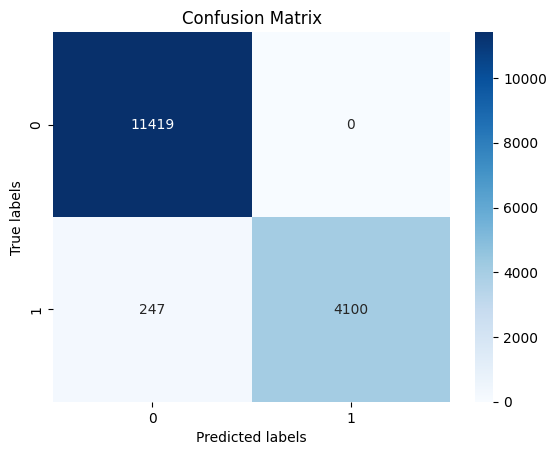

Classification Report:
              precision    recall  f1-score   support

           0     0.9788    1.0000    0.9893     11419
           1     1.0000    0.9432    0.9708      4347

    accuracy                         0.9843     15766
   macro avg     0.9894    0.9716    0.9800     15766
weighted avg     0.9847    0.9843    0.9842     15766



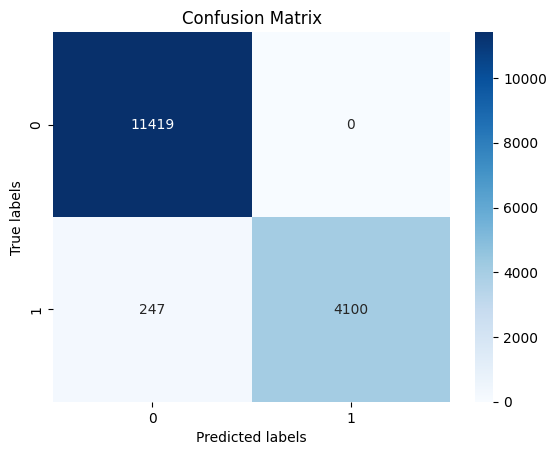

In [110]:
# model evaluation
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_test, y_test):
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

def confusion_matrix_model(model, X_test, y_test):
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Create a seaborn heatmap for the confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

    # Add labels, title, and axis ticks to the plot
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")

    # Display the plot
    plt.show()
from sklearn.metrics import classification_report, confusion_matrix
evaluate_model(classifier,X_test,y_test)
confusion_matrix_model(classifier,X_test,y_test)
evaluate_model(classifier,X_test,y_test)
confusion_matrix_model(classifier,X_test,y_test)

# Submission :

In [111]:
df_encoded.columns



Index(['booking_lead_time', 'weekend_stays', 'weekday_stays', 'wisymurfs',
       'smurflings', 'number_of_babies', 'smurfy_smurf',
       'number_of_previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'average_daily_rate',
       'smurfberry_spaces_required', 'number_of_special_requests',
       'total_bookings', 'most_likely_to_be_canceled',
       'got_requested_mushroom', 'total_stay_days', 'lodgin_sum',
       'arrival_date_month_sin', 'arrival_date_month_cos',
       'smurvation_status_date_month_sin', 'smurvation_status_date_month_cos',
       'arrival_date_day_of_month_sin', 'arrival_date_day_of_month_cos',
       'smurvation_status_date_day_sin', 'smurvation_status_date_day_cos',
       'smurvation_status_date_year_BB', 'smurvation_status_date_year_SP',
       'smurvation_status_date_year_TT', 'smurvation_status_date_year_WW',
       'arrival_date_year_BB', 'arrival_date_year_SP', 'arrival_date_year_WW',
       'mushotel

In [112]:
test_data=pd.read_csv("./test_processed.csv",index_col=False).columns

In [113]:

test_data=pd.read_csv("./test_processed.csv",index_col=False)
ids=test_data["smurvation_id"]

test_data=test_data.drop("smurvation_id",axis=1)


X=test_data.values

predictions=classifier.predict(X)


In [ ]:
data={
  "smurvation_id":ids,
  "is_canceled":predictions
}

submission_dataframe=pd.DataFrame(data)

submission_dataframe.to_csv("submission.csv", index=False)
